<font size="5">Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science\
No liability or warranty; only for educational and non-commercial purposes\
See some basic hints for working with Jupyter notebooks in README.md</font>

<font size="6">Data Structure Priority Queue with Visualization</font>

<font size="6">Data Structure for storing Keys with their respective Priorities</font>

In [1]:
class Node:  
    def __init__(self, name_input, prio_input):
        self.name = name_input
        self.prio = prio_input

<font size="6">Storage for Elements of Priority Queue</font>

In [2]:
ELEMENTS = []
HEAPSIZE = 0
MAX_HEAPSIZE = 7 # Atleast for now
# Keeping Track of the Priority Queue States aswell as which Operations are executed
STEPS = []
STATES = []
# Visualization Constants
OFFSET = 0.5
ALPHA_VAL = 0.6

In [3]:
import math
LEN_LONGEST_NAME = 1
LEN_BIGGEST_NUMBER = 1 # only the amount of digits is important
BIGGEST_NUMBER_NEGATIVE = False

def update_longest_name_number(name, prio): # for Visualizing purposes. See desired_linewidth equation below
    global LEN_LONGEST_NAME, LEN_BIGGEST_NUMBER, BIGGEST_NUMBER_NEGATIVE
    if len(name) > LEN_LONGEST_NAME:
        LEN_LONGEST_NAME = len(name)
    if prio == 0: # Log Base 10 of zero is undefined but I only care about the amount of digits. So I can replace it with 1 instead
        prio = 1
    amt_digits = math.floor(math.log10(abs(prio)))+1
    if amt_digits >= LEN_BIGGEST_NUMBER:
        if amt_digits >= LEN_BIGGEST_NUMBER and prio < 0: # When having the same length, negative numbers are prioritized since the minus also takes space and therefore makes them longer
            BIGGEST_NUMBER = amt_digits
            BIGGEST_NUMBER_NEGATIVE = True
        elif amt_digits > LEN_BIGGEST_NUMBER:
            BIGGEST_NUMBER_NEGATIVE = False
            BIGGEST_NUMBER = amt_digits

<font size="6">Function to reset Priority Queue</font>

In [4]:
def reset_pq():
    global ELEMENTS, HEAPSIZE, STEPS, STATES, LEN_LONGEST_NAME, LEN_BIGGEST_NUMBER, BIGGEST_NUMBER_NEGATIVE
    ELEMENTS, HEAPSIZE = [], 0
    STEPS, STATES = [], []
    LEN_LONGEST_NAME = 1
    LEN_BIGGEST_NUMBER = 1
    BIGGEST_NUMBER_NEGATIVE = False

<font size="6">Helper Functions for easier access to Children/Parents of a given Element in Heap</font>

In [5]:
def parent(i):
    return (i-1)//2 # '//' means division with floor function (round down to next lowest Integer)

def left(i):
    return 2*i + 1

def right(i):
    return 2*i + 2

<font size="6">Output Colors</font>

In [6]:
COL_INSERTION = 'blue' # (as Infinity)
COL_COMPARED_FALSE = 'salmon'
COL_COMPARED_TRUE = 'green'
COL_OVERFLOW_UNDERFLOW = 'darkred'
COL_EXTRACTION = 'gold'
COL_REDUCTION = 'tab:pink'
COL_EXCHANGED = 'tab:orange'
COL_DELETED = 'black'

COL_HORIZONTAL_LINES = 'k'
COL_LAST_HORIZONTAL_LINE = 'blue'
COL_LAST_VERTICAL_LINE = 'tomato'

In [7]:
import copy
def save_state():
    global STATES
    STATES.append(copy.deepcopy(ELEMENTS)) # deep-copies Indices 0 to HEAPSIZE-1 into states. Regular "=" operator only creates shallow copies

In [8]:
def add_infinity():
    global STEPS, STATES
    state_with_infinity = copy.deepcopy(ELEMENTS[:HEAPSIZE-1])
    state_with_infinity.append(Node('', float('inf')))
    STATES.append(state_with_infinity)
    STEPS.append((HEAPSIZE-1, '_', 'INSERTED_AS_INFINITY'))

<font size="6">Implementation of a Priority Queue</font>

In [9]:
def insert_multiple(elements_to_insert=[]):
    for name_input, prio_input in elements_to_insert:
        insert_key(name_input, prio_input)

def insert_key(name_input, prio_input):
        global ELEMENTS, HEAPSIZE, STEPS, STATES
        if HEAPSIZE + 1 > MAX_HEAPSIZE:
            save_state()
            STEPS.append(('_', '_', 'OVERFLOW_UNDERFLOW'))
            return
        name_already_exists = False
        for element in ELEMENTS:
            if element.name == name_input:
                name_already_exists = True
        if not name_already_exists:

            ELEMENTS.append(Node(name_input, float('inf'))) # float('inf') = positive infinity
            HEAPSIZE += 1 

            add_infinity() # adds Insertion as Infinity as a step for the Visualization

            heap_decrease_key(HEAPSIZE-1, prio_input)

            update_longest_name_number(name_input, prio_input)
            
        else:
            print("\nThere is already an element named", name_input, "Please choose a different Name.")
            
def heap_decrease_key(i, prio_input):
    global ELEMENTS, STEPS, STATES
    if prio_input >= ELEMENTS[i].prio:
        print("\nERROR: New priority must be smaller than old priority")
        return       
    ELEMENTS[i].prio = prio_input
    
    save_state()
    STEPS.append((i, '_', 'REDUCTION'))
    
    while i > 0 and ELEMENTS[parent(i)].prio > ELEMENTS[i].prio:
        
        save_state()
        STEPS.append((i, parent(i), 'COMPARED_TRUE'))
        
        ELEMENTS[i], ELEMENTS[parent(i)] = ELEMENTS[parent(i)], ELEMENTS[i]
        save_state()
        STEPS.append((i, parent(i), 'EXCHANGED'))
        i = parent(i)
        
    if i != 0:
        
        save_state()
        STEPS.append((i, parent(i), 'COMPARED_FALSE'))
        
def extract_min():
    global ELEMENTS, HEAPSIZE
    if HEAPSIZE < 1:
        save_state()
        STEPS.append(('_', '_', 'OVERFLOW_UNDERFLOW'))
        return      
    min_element = ELEMENTS[0]
    
    save_state()
    STEPS.append((0, '_', 'EXTRACTION'))
    
    HEAPSIZE -= 1
    ELEMENTS[0], ELEMENTS[HEAPSIZE] = ELEMENTS[HEAPSIZE], ELEMENTS[0]
    
    if HEAPSIZE > 0:
        save_state()
        STEPS.append((0, HEAPSIZE, 'SWAP_AND_DELETE'))
    
    ELEMENTS = ELEMENTS[:HEAPSIZE] # Deletes last Element (previously the min)
    
    save_state()
    STEPS.append((HEAPSIZE, '_', 'SWAP_AND_DELETE'))
    
    min_heapify(0)   
    
        
def min_heapify(i):
    global ELEMENTS, HEAPSIZE
    l = left(i)
    r = right(i)
    if 0 <= l < HEAPSIZE and ELEMENTS[l].prio < ELEMENTS[i].prio:
        minimum = l
        save_state()
        STEPS.append((l, i, 'COMPARED_TRUE')) 
    else:
        minimum = i
        if 0 <= l < HEAPSIZE:
            save_state()
            STEPS.append((l, i, 'COMPARED_FALSE')) 
    if 0 <= r < HEAPSIZE and ELEMENTS[r].prio < ELEMENTS[minimum].prio:
        minimum = r
        save_state()
        STEPS.append((r, i, 'COMPARED_TRUE'))
    else:
        if 0 <= r < HEAPSIZE:
            save_state()
            STEPS.append((r, i, 'COMPARED_FALSE'))
    if minimum != i:
        ELEMENTS[i], ELEMENTS[minimum] = ELEMENTS[minimum], ELEMENTS[i]
        save_state()
        STEPS.append((i, minimum, 'EXCHANGED'))
        min_heapify(minimum)

def reduce_priority(name_input, new_prio):
    global ELEMENTS   
    key_found = False  
    for index, element in enumerate(ELEMENTS):
        if element.name == name_input:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        print("\nERROR: Element whose Priority you want to decrease does not exist")
        return     
    if ELEMENTS[at_index].prio <= new_prio: 
        print("\nERROR: New Priority of", ELEMENTS[at_index].name ,"is not lower than old Priority! Priority may only ever decrease. Priority stays unchanged")
        return
    heap_decrease_key(at_index,new_prio)

<font size="6">Visualization</font>

In [10]:
def show_legend():
    color_array = [[COL_INSERTION, "Insertion as Infinity"], [COL_COMPARED_TRUE, "Key Comparison returning True"], [COL_COMPARED_FALSE, "Key Comparison returning False"],
                  [COL_EXCHANGED, "Key exchanged"], [COL_REDUCTION, "Key reduced"], [COL_EXTRACTION, "Key to be extracted"], [COL_DELETED, "Key deleted"], [COL_OVERFLOW_UNDERFLOW, "Overflow/Underflow"]]
    plt.figure(figsize=(10, 6))
    plt.axis([0, 15, 0.5, 4.5])
    plt.axis('off')
    first_x_pos, second_x_pos = 1, 10
    for i in range(4):
        plt.plot([first_x_pos, first_x_pos], [(i+1)-OFFSET+0.1, (i+1)+OFFSET-0.1], color=color_array[3-i][0], linewidth=16, solid_capstyle="butt", alpha=ALPHA_VAL)
        plt.text(x=first_x_pos+OFFSET, y=(i+1), s=color_array[3-i][1], fontsize=16, verticalalignment='center', horizontalalignment='left')
    for i in range(4):
        # Key Reduction has standard Alpha Value while Extraction, Deletion and Over-/Underflow have an Alpha Value of .2 more
        if color_array[-(i+1)][1] == 'Key Reduction':
            respective_alpha_value = ALPHA_VAL
        else:
            respective_alpha_value = ALPHA_VAL+0.2
        plt.plot([second_x_pos, second_x_pos], [(i+1)-OFFSET+0.1, (i+1)+OFFSET-0.1], color=color_array[-(i+1)][0], linewidth=16, solid_capstyle="butt", alpha=respective_alpha_value)
        plt.text(x=second_x_pos+OFFSET, y=(i+1), s=color_array[-(i+1)][1], fontsize=16, verticalalignment='center', horizontalalignment='left')
    plt.title('Priority Queue Operations', fontsize=20)
    plt.show()

In [11]:
import matplotlib.pyplot as plt
def visualize():  
    # Naive Attempt at scaling colored markings. Intention: Never leave a part of an Element uncovered by the highlighting
    # e.g. if there is an Element displayed as "A,256", both the letter aswell as the whole number has to be in the colored highlighting. But the highlighting should not extend
    # too far to the left or right if not needed. All Highlightings are the same size on the entire display
    # Assumptions: Widest Letter ('W') takes about 16 linewidth-units of space horizontally, floor(log(base 10)) + 1 of a number gives amount of digits. 
    # Digits seem to be the same size. An increase of 12 units per Digit looks good to me, comma takes about 4 units of width. A minus would take around 6 units
    if BIGGEST_NUMBER_NEGATIVE:
        minus_width = 6
    else:
        minus_width = 0
    desired_linewidth = LEN_LONGEST_NAME*16 + LEN_BIGGEST_NUMBER*12 + 4 + minus_width
    scalingfactor_due_to_linewidth = (0.2*(desired_linewidth - 32) + 32) / 32
    desired_x_figsize = math.ceil(len(STEPS)*1.5)*(scalingfactor_due_to_linewidth) # The constant 1.5 was chosen arbitrarily. It just looked acceptable
    desired_y_figsize = MAX_HEAPSIZE + 2

    plt.figure(figsize = [desired_x_figsize, desired_y_figsize])
    
    xtickarray = list((range(1, len(STEPS)+1)))
    xtickarray.append('Result')
    plt.xticks(range(0, len(STEPS)+1), labels=xtickarray, fontsize=16) # +1 since i want the tick saying "Result" aswell
    plt.yticks(range(0, MAX_HEAPSIZE), fontsize=16)
    plt.axis([-OFFSET, len(STEPS)+OFFSET, -OFFSET, MAX_HEAPSIZE-1+OFFSET]) # xstart, xend, ystart, yend
    
    plt.hlines(xmin=0-OFFSET, xmax=len(STEPS)+1+OFFSET, y=MAX_HEAPSIZE-OFFSET, color=COL_LAST_HORIZONTAL_LINE, linewidth=3) # blue horizontal at the very top
    plt.vlines(x=len(STEPS)-OFFSET, ymin=0-OFFSET, ymax=MAX_HEAPSIZE-1+OFFSET, color=COL_LAST_VERTICAL_LINE) # red vertical line seperating Operations and Result

    for row in range(0, MAX_HEAPSIZE):
        plt.hlines(xmin=0-OFFSET, xmax=len(STEPS)+1+OFFSET, y=row+OFFSET, color=COL_HORIZONTAL_LINES, alpha = 0.5) # horizontal lines 
    plt.text(x=-1, y=MAX_HEAPSIZE, s='Key Comparisons', fontsize=16)
    
    for state_index, state in enumerate(STATES): 
        for element_index, element in enumerate(state): 
            if element.prio == float('inf'):
                plt.text(x=state_index, y=element_index, s=str(element.prio),
                          fontsize=16, verticalalignment='center', horizontalalignment='center')
            else:
                plt.text(x=state_index, y = element_index, s = str(element.name)+','+str(element.prio),
                          fontsize=16, verticalalignment='center', horizontalalignment='center')

    for index, element in enumerate(ELEMENTS): # for the Result/Rightmost state
        plt.text(x=len(STATES), y=index, s=str(element.name) + ',' + str(element.prio),
                  fontsize=16, verticalalignment='center', horizontalalignment='center')
 
    for operation_index, my_tuple in enumerate(STEPS):
        indexA = my_tuple[0]
        indexB = my_tuple[1]
        Type = my_tuple[2]
        if Type == 'COMPARED_FALSE':
            plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET],
                          linewidth=desired_linewidth, solid_capstyle="butt", color=COL_COMPARED_FALSE, alpha=ALPHA_VAL)
            
            plt.plot([operation_index,operation_index], [indexB-OFFSET,indexB+OFFSET],
                          linewidth=desired_linewidth, solid_capstyle="butt", color=COL_COMPARED_FALSE, alpha=ALPHA_VAL)
            
            left_operand = STATES[operation_index][indexA]
            right_operand = STATES[operation_index][indexB]
            
            plt.text(x=operation_index, y=MAX_HEAPSIZE+0.3, s=str(left_operand.name) + ',' + str(left_operand.prio), # TODO work with box
                    fontsize=16, verticalalignment='center', horizontalalignment='center',  bbox=dict(facecolor=COL_COMPARED_FALSE, edgecolor=COL_COMPARED_FALSE, pad=5.0, fill = True, alpha = ALPHA_VAL))
            
            plt.text(x=operation_index, y=MAX_HEAPSIZE, s="<",
                    fontsize=16, verticalalignment='center', horizontalalignment='center')
            
            plt.text(x=operation_index, y=MAX_HEAPSIZE-0.3, s=str(right_operand.name) + ',' + str(right_operand.prio),
                    fontsize=16, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor=COL_COMPARED_FALSE, edgecolor=COL_COMPARED_FALSE, pad=5.0, fill=True, alpha=ALPHA_VAL))

        elif Type == 'COMPARED_TRUE':
            plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET],
                          linewidth=desired_linewidth, solid_capstyle="butt", color=COL_COMPARED_TRUE, alpha=ALPHA_VAL)

            plt.plot([operation_index,operation_index], [indexB-OFFSET,indexB+OFFSET],
                          linewidth=desired_linewidth, solid_capstyle="butt", color=COL_COMPARED_TRUE, alpha=ALPHA_VAL)
            
            left_operand = STATES[operation_index][indexA]
            right_operand = STATES[operation_index][indexB]

            plt.text(x=operation_index, y=MAX_HEAPSIZE+0.3, s=str(left_operand.name) + ',' + str(left_operand.prio),
                    fontsize=16, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor=COL_COMPARED_TRUE, edgecolor=COL_COMPARED_TRUE, pad=5.0, fill=True, alpha=ALPHA_VAL))
            
            plt.text(x=operation_index, y=MAX_HEAPSIZE, s="<",
                    fontsize=16, verticalalignment='center', horizontalalignment='center')
            
            plt.text(x=operation_index, y=MAX_HEAPSIZE-0.3, s=str(right_operand.name) + ',' + str(right_operand.prio),
                    fontsize=16, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor=COL_COMPARED_TRUE, edgecolor=COL_COMPARED_TRUE, pad=5.0, fill=True, alpha=ALPHA_VAL))

        elif Type == 'REDUCTION':
            plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_REDUCTION, alpha=ALPHA_VAL)

        elif Type == 'EXCHANGED':
            plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_EXCHANGED, alpha=ALPHA_VAL)
            plt.plot([operation_index,operation_index], [indexB-OFFSET,indexB+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_EXCHANGED, alpha=ALPHA_VAL)
            # With the min_heapify(i) operation, there is the possibility for a comparison returning True to be followed by a comparison returning False before the keys are being exchanged.
            # This happens when the given left index is smaller than the right with the right one still existing. In that case the arrow is of roughly size 2, while normally it is of size 1
            # Since i don't want to distinguish min-heapify(i), i look for the last comparison returning True as it is the one responsible for the exchange
            # Said index is saved in comparison_true_index. With that, I know where the arrow has to start and how long it has to be      
            comparison_true_index = operation_index-1
            while STEPS[comparison_true_index][2] != 'COMPARED_TRUE':
                comparison_true_index -= 1
            arrow_length = operation_index - comparison_true_index
            xinput = comparison_true_index + desired_linewidth/180  
            dxinput = 1-2*desired_linewidth/180+(arrow_length-1)
            # desired_linewidth/180 can be understood as the highlighting distance between the left- or rightmost parts of the highlighting box and the middle (180 is approximated),
            # so x + desired_linewidth/180 gives the x coordinate for where the highlighting box originating at x ends (a.k.a its right border)
            # 1-2*desired_linewidth/180 represents the space between two highlighting boxes if they are adjacent. It is represented by the dashed line "---",
            # the square brackets represent the highlighting boxes respectively
            # [ a,1 ]---[ b,2 ]
            plt.arrow(x=xinput, y=indexA, dx=dxinput, dy=indexB - indexA, head_width=0.05, length_includes_head=True, width=0.0025)
            plt.arrow(x=xinput, y=indexB, dx=dxinput, dy=indexA - indexB, head_width=0.05, length_includes_head=True, width=0.0025)

        elif Type == 'INSERTED_AS_INFINITY':
            plt.arrow(x=operation_index+desired_linewidth/180, y=indexA, dx=1-2*desired_linewidth/180, dy=0, head_width=0.1, length_includes_head=True, width=0.01, color=COL_INSERTION, alpha=0.4) 
            plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_INSERTION, alpha=ALPHA_VAL)

        elif Type == 'EXTRACTION':
            plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_EXTRACTION, alpha=ALPHA_VAL+0.2)

        elif Type == 'SWAP_AND_DELETE':
            if indexB != '_': # Swap (technically the same as EXCHANGED but I do not want the arrows. That's why its seperated)
                plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_EXCHANGED, alpha=ALPHA_VAL)
                plt.plot([operation_index,operation_index], [indexB-OFFSET,indexB+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_EXCHANGED, alpha=ALPHA_VAL)
            else: # Delete
                plt.plot([operation_index,operation_index], [indexA-OFFSET,indexA+OFFSET], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_DELETED, alpha=ALPHA_VAL+0.2)

        else: # Type == 'OVERFLOW_UNDERFLOW'
            plt.plot([operation_index,operation_index], [0-OFFSET, MAX_HEAPSIZE], linewidth=desired_linewidth, solid_capstyle="butt", color=COL_OVERFLOW_UNDERFLOW, alpha=ALPHA_VAL+0.2)
    plt.xlabel('Operations', fontsize=20)
    plt.ylabel('Array Indices', fontsize=20)
    plt.show()

<font size="6">Adjust Maximum Heapsize</font>

In [12]:
MAX_HEAPSIZE = 7 # Adjust the maximum amount of Elements which can be in the Heap at once. Default is set to 7

<font size="6">Your Tests go here...</font>

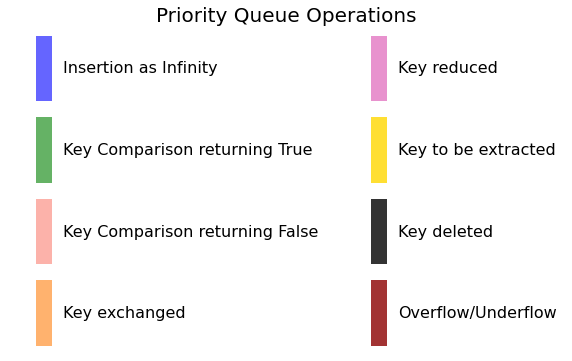

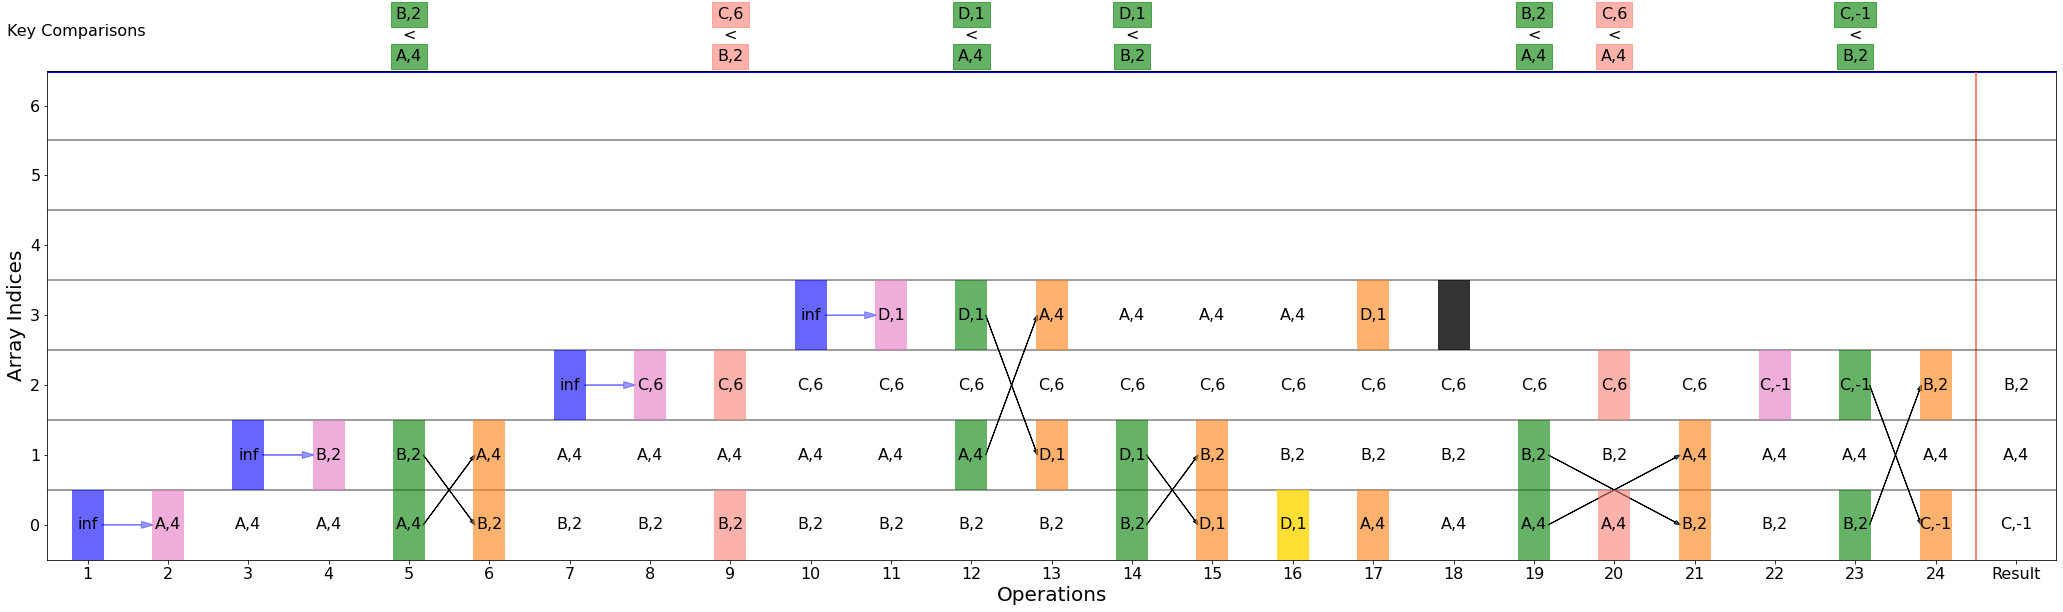

In [13]:
elements_to_insert = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

insert_multiple(elements_to_insert)

extract_min()

reduce_priority('C', -1)

#############
show_legend()
visualize()
reset_pq() # Resets Contents of Priority Queue (ignore)